<a href="https://colab.research.google.com/github/Lda123/Campaign/blob/main/Copy_of_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GOALS
Optimasi Campaign Results terkait penawaran produk baru, sehingga mendapatkan profit yang maksimal di bulan depan dan memahami karakteristik customers yang menerima penawaran produk baru tersebut.

In [ ]:
import pandas as pd #untuk manipulasi dan analisis data, terutama dalam bentuk tabel (DataFrame).
import numpy as nm #untuk operasi numerik, seperti perhitungan array multidimensi, fungsi matematika, dan statistik.
import matplotlib.pyplot as plt #untuk membuat visualisasi data seperti grafik garis, histogram, scatter plot, dll.
import seaborn as sns #library visualisasi data tingkat tinggi yang bekerja di atas Matplotlib dengan menyediakan gaya dan fungsi yang lebih estetis untuk membuat grafik.

pd.set_option('display.max_columns', None) #Mengatur opsi tampilan Pandas agar semua kolom dari DataFrame dapat ditampilkan tanpa dipotong. (None: tidak ada batasan jumlah kolom yang ditampilkan)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('colorblind')

import warnings #untuk mengatur atau memfilter peringatan Python.
warnings.filterwarnings('ignore')

# DATA QUALITY CHECK


*   Q1: Apakah ada features yang data type-nya tidak sesuai?
*   Q2: Adakah duplicate, missing values atau outliers? Bagaimana anda mengatasi hal-hal tersebut?
*   Q3: Apakah terdapat distribusi yang tidak masuk akal?







In [ ]:
df = pd.read_csv('marketing_data.csv')
df.head() #menampilkan 5 baris pertama dari DataFrame secara default.
# bisa juga pake --> display(df), menampilkan keseluruhan tapi jika banyak data nanti ditengah ada ... dan ada dipaling bawah jumlah data dan colomnya
# or print(df), menampilkan keseluruhan data gk pakai garis tabel jadi agak berantakan.

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [ ]:
df.shape #untuk mengetahui baris dan colom data yang ada.
# harusnya ini gk perlu jika nantu pake yg default(df)

(2240, 28)

# Question 1
Apakah ada features yang data type-Nya tidak sesuai?

In [ ]:
df.info() #metode pada objek DataFrame di library Pandas
#yang digunakan untuk menampilkan informasi ringkas tentang struktur DataFrame.
#contohnya tipe data, jumlah entry, nama colom.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

###KESIMPULAN ADA KESALAHAN PADA BAGIAN KOLOM **Income dan Dt_Customer**


*  **Income**: ada spasi pada bagian kolomnya, dan tipe datanya harusnya int64.
*  **Dt_Customer**: tipe datanya harusnya tanggal.



In [ ]:
for dtype, col in (list(zip(df.dtypes, df.columns))):
#loop ini mengiterasi melalui pasangan tipe data (dtype) dan nama kolom (col) dari DataFrame (df).
#zip(df.dtypes, df.columns) menggabungkan tipe data dan nama kolom menjadi pasangan (tuple).
#list(zip(...)) mengubah hasil zip menjadi list untuk iterasi.

  if dtype == 'int64' or dtype == 'float64':
    print(col, dtype)
    print(df[col].min(), df[col].max())
  else:
    print(col, dtype)
    print(df[col].unique())

  print()

ID int64
0 11191

Year_Birth int64
1893 1996

Education object
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']

Marital_Status object
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']

 Income  object
['$84,835.00 ' '$57,091.00 ' '$67,267.00 ' ... '$46,310.00 ' '$65,819.00 '
 '$94,871.00 ']

Kidhome int64
0 2

Teenhome int64
0 2

Dt_Customer object
['6/16/14' '6/15/14' '5/13/14' '5/11/14' '4/8/14' '3/17/14' '1/29/14'
 '1/18/14' '1/11/14' '12/27/13' '12/9/13' '12/7/13' '10/16/13' '10/5/13'
 '9/11/13' '8/1/13' '7/23/13' '7/1/13' '5/28/13' '3/26/13' '3/15/13'
 '2/12/13' '11/23/12' '10/13/12' '9/14/12' '6/29/14' '5/31/14' '5/30/14'
 '4/27/14' '4/11/14' '10/29/13' '10/9/13' '5/10/13' '5/9/13' '4/25/13'
 '4/20/13' '3/30/13' '3/1/13' '2/14/13' '1/11/13' '1/3/13' '12/19/12'
 '12/15/12' '12/2/12' '9/17/12' '9/11/12' '5/12/14' '4/28/14' '3/29/14'
 '3/6/14' '3/4/14' '2/4/14' '2/3/14' '1/1/14' '12/12/13' '11/15/13'
 '9/20/13' '9/5/13' '8/31/13' '7/30/13' '7/27/13' '6/22/1

In [ ]:
df.columns = df.columns.str.replace(' ', '')

In [ ]:
df.Income

,Income
0,"$84,835.00"
1,"$57,091.00"
2,"$67,267.00"
3,"$32,474.00"
4,"$21,474.00"
...,...
2235,"$66,476.00"
2236,"$31,056.00"
2237,"$46,310.00"
2238,"$65,819.00"


In [ ]:
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '')
df['Income'] = df['Income'].astype('float') #.astype() hanya dapat digunakan
#untuk mengubah tipe data dasar (seperti float, int, str, atau category)
#tanpa melakukan konversi yang kompleks.

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer']) #Konversi ke datetime
#sering kali melibatkan parsing, yaitu memahami format string atau angka
#tertentu sebagai tanggal, yang membutuhkan fungsi khusus seperti pd.to_datetime().

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# QUESTION 2
Adakah duplicate,  missing values atau outliers? Bagaimana mengatasi hal-hal tersebut?

## Duplicate

In [ ]:
df.duplicated().sum()

np.int64(0)

## Missing Values

In [ ]:
df.isna().sum().sort_values(ascending=False)
#Mengidentifikasi jumlah nilai NaN (data yang hilang) di setiap kolom dalam DataFrame df.
#Mengurutkan kolom berdasarkan jumlah NaN dalam urutan menurun (descending).

,0
Income,24
ID,0
Education,0
Year_Birth,0
Marital_Status,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


<Axes: xlabel='Income'>

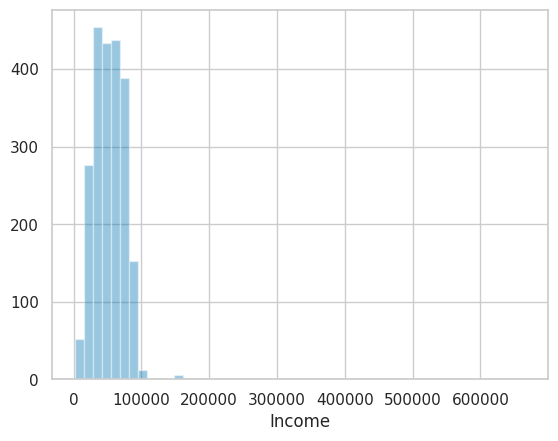

In [ ]:
sns.distplot(df['Income'], kde=False)
#Kode ini membuat plot histogram distribusi data kolom Income dari DataFrame df.

<Axes: >

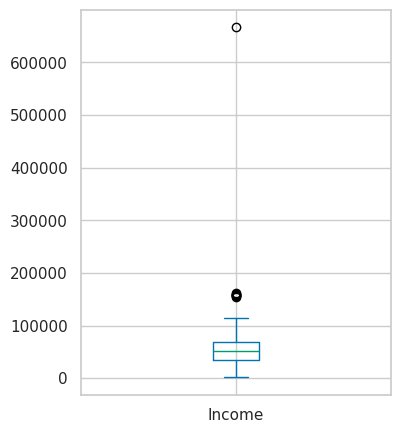

In [ ]:
df['Income'].plot(kind='box', figsize=(4,5))
#Kode ini membuat plot boxplot distribusi data kolom Income dari DataFrame df.

In [ ]:
df['Income'] = df['Income'].fillna(df['Income'].median())
#digunakan untuk mengisi nilai yang hilang (NaN) di kolom Income dengan median dari kolom tersebut
#contoh: 5000, NaN (Nilai Kosong), 7000, NaN, 9000. Maka jika median: 7000 dan menggunakan syntax diatas,
#akan mendapatkan hasil 5000, 7000, 7000, 7000, 9000.

## Outliers

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [ ]:
df_to_plot = df.select_dtypes(include=['int', 'float'])
#Memilih hanya kolom-kolom dalam dataframe df yang memiliki tipe data numerik (baik integer maupun float).
df_to_plot.drop(columns=['ID', 'AcceptedCmp1',  'AcceptedCmp2', 'AcceptedCmp3',
                          'AcceptedCmp4', 'AcceptedCmp5', 'Response' , 'Complain'], inplace=True)
#Menghapus beberapa kolom tertentu dari df_to_plot. Dan inplace=True: Menyatakan bahwa perubahan dilakukan langsung pada DataFrame df_to_plot tanpa membuat salinan baru.

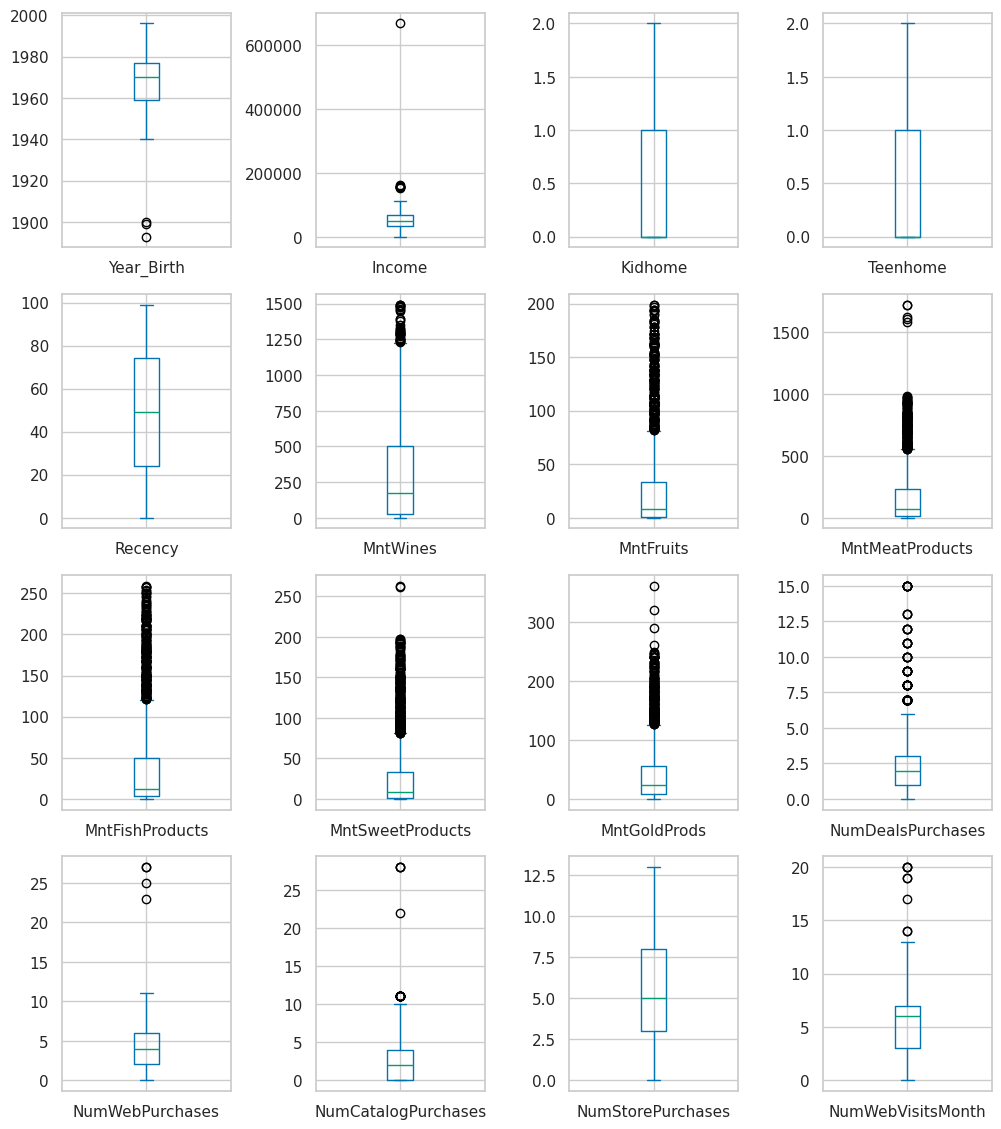

In [ ]:
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5)

In [ ]:
df = df[df['Year_Birth']> 1900].reset_index(drop=True)
df.Year_Birth.unique()

array([1970, 1961, 1958, 1967, 1989, 1954, 1947, 1979, 1959, 1981, 1969,
       1977, 1960, 1966, 1976, 1965, 1956, 1975, 1971, 1986, 1972, 1974,
       1990, 1987, 1984, 1968, 1955, 1983, 1973, 1978, 1952, 1962, 1964,
       1982, 1963, 1957, 1980, 1945, 1949, 1948, 1953, 1946, 1985, 1992,
       1944, 1951, 1988, 1950, 1994, 1993, 1991, 1996, 1995, 1943, 1941,
       1940])

In [ ]:
display(df_to_plot)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1970,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1
1,1961,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5
2,1958,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2
3,1967,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7
4,1989,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,66476.0,0,1,99,372,18,126,47,48,78,2,5,2,11,4
2236,1977,31056.0,1,0,99,5,10,13,3,8,16,1,1,0,3,8
2237,1976,46310.0,1,0,99,185,2,88,15,5,14,2,6,1,5,8
2238,1978,65819.0,0,0,99,267,38,701,149,165,63,1,5,4,10,3


In [ ]:
df_to_plot.dtypes

,0
Year_Birth,int64
Income,float64
Kidhome,int64
Teenhome,int64
Recency,int64
MntWines,int64
MntFruits,int64
MntMeatProducts,int64
MntFishProducts,int64
MntSweetProducts,int64


## QUESTION 3
Apakah terdapat distribusi yang tidak masuk akal?

In [ ]:
numeric = df_to_plot.columns
numeric

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

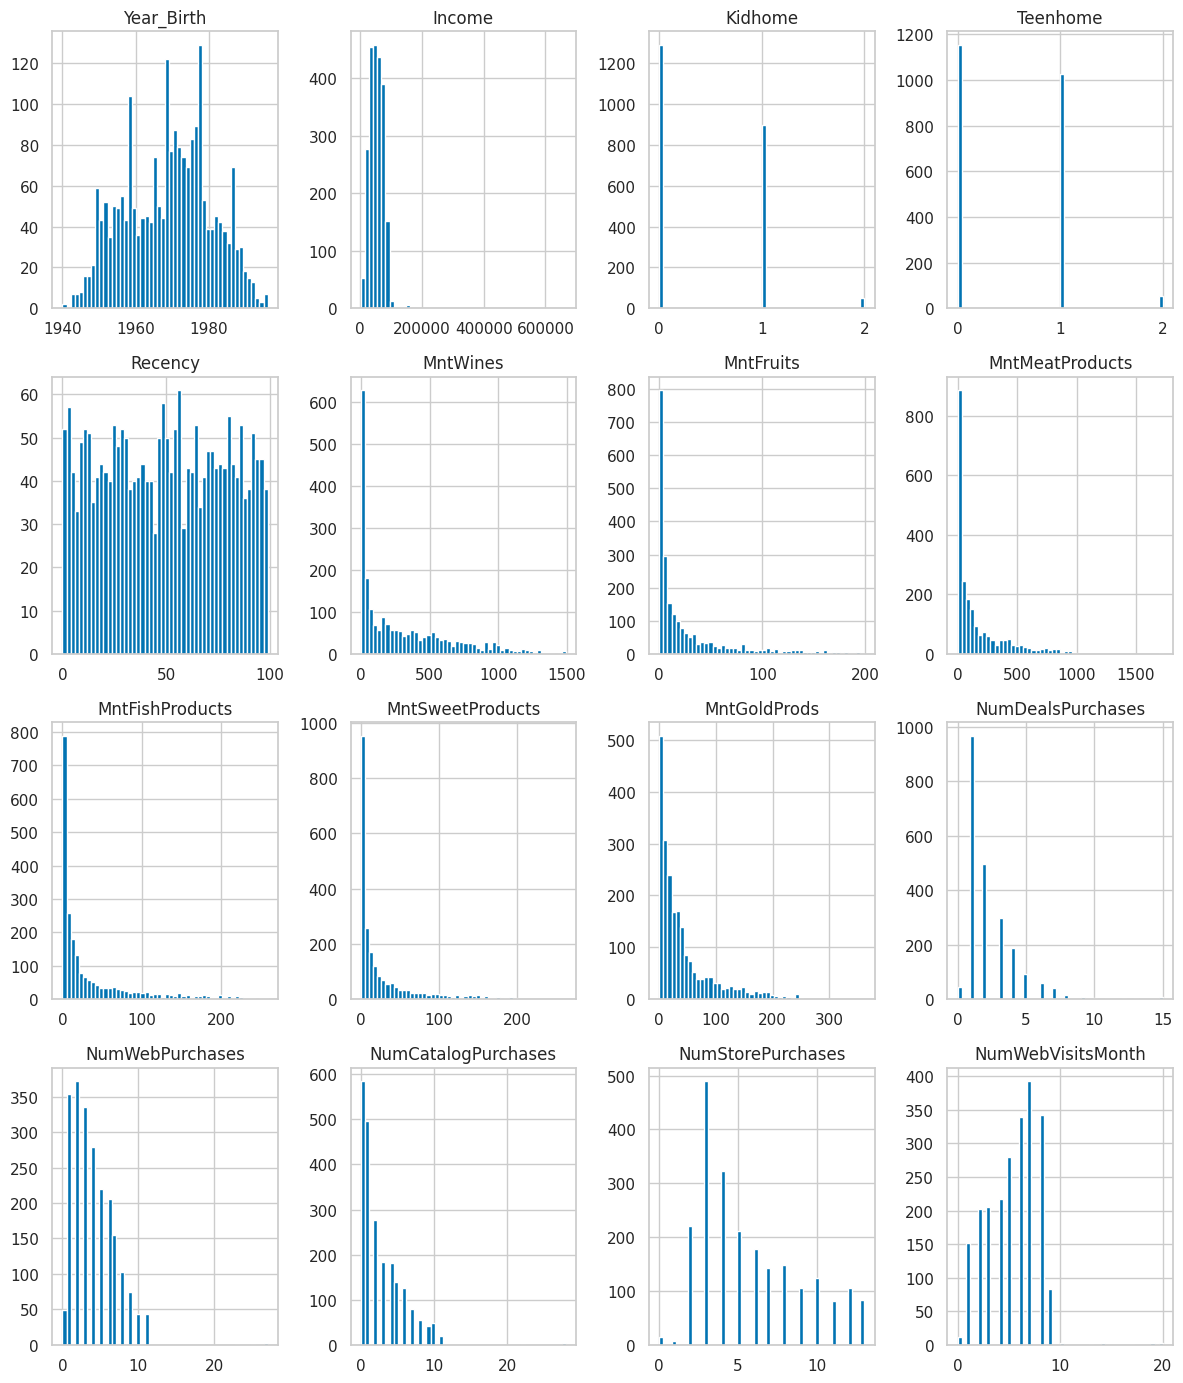

In [ ]:
fig = plt.figure(figsize=(12,14))
ax = plt.gca()
#membuat kanvas uk 12 x 14

df.hist(bins=50, ax=ax, layout=(4,4), column=numeric)
#bins=50, Menentukan jumlah "bin" atau interval pada histogram. Dalam hal ini, histogram akan memiliki 50 kelompok nilai.
plt.tight_layout()
#Menyesuaikan jarak antar subplot secara otomatis sehingga plot tidak saling tumpang tindih dan terlihat rapi.
plt.show()

## Data Insight

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [ ]:
## belum ada analayst tentang data income

## Year Birth

In [ ]:
df['Customer_Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
#membuat kolom baru untuk menghitung umur pelanggan berdasarkan tahun kelahiran

In [ ]:
df.Customer_Age

,Customer_Age
0,44
1,53
2,56
3,47
4,25
...,...
2232,37
2233,36
2234,36
2235,34


<Axes: >

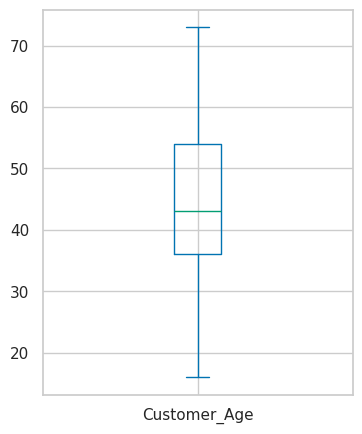

In [ ]:
df.Customer_Age.plot(kind='box', figsize=(4,5))

<Axes: xlabel='Customer_Age', ylabel='Count'>

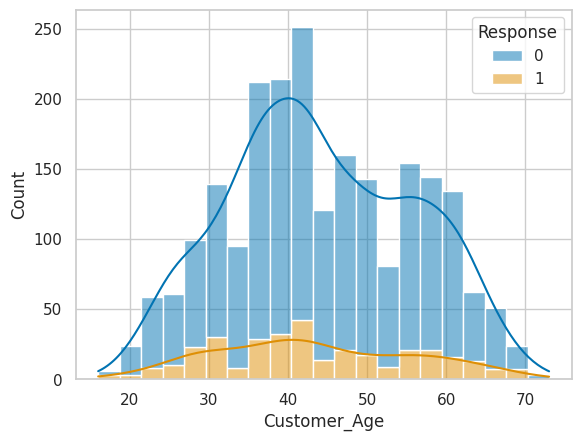

In [ ]:
sns.histplot(data=df, x='Customer_Age', hue='Response', multiple='stack', kde=True)
#stack bisa diganti dengan dodge

## Education

In [ ]:
df.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

<Axes: xlabel='Education', ylabel='count'>

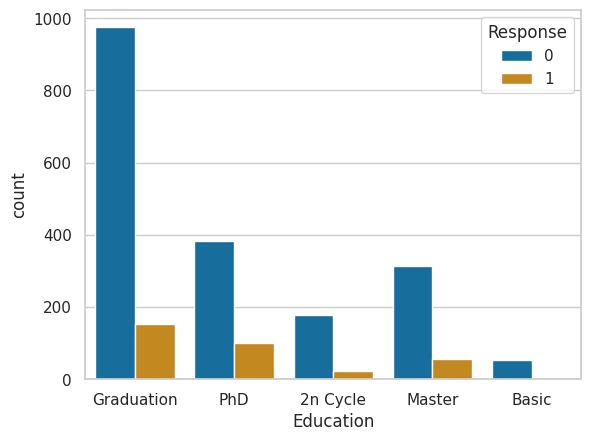

In [ ]:
sns.countplot(data=df, x='Education', hue='Response')

In [ ]:
def tambahkanPersentase(dataframe, variabelX, sumbu):
    '''
    tambahkanPersentase(): Menambahkan persentase pada setiap bar (termasuk pembagian berdasarkan hue)
    Argumen:
        dataframe: DataFrame pandas yang digunakan untuk membuat plot
        variabelX: (string) Nama kolom yang menjadi variabel pada sumbu X
        sumbu: Objek Axes dari matplotlib (seperti hasil plot Seaborn atau matplotlib)
    '''
    # 1. Hitung jumlah kategori unik pada variabel X, abaikan nilai NaN
    jumlahKategoriX = len([nilai for nilai in dataframe[variabelX].unique() if nilai == nilai])

    # 2. Ambil semua bar dari plot (bar diwakili oleh objek "patch")
    semuaBar = sumbu.patches

    # 3. Iterasi untuk setiap kategori pada sumbu X
    for indeks in range(jumlahKategoriX):
        # 3a. Ambil bar-bar yang sesuai dengan kategori tertentu, berdasarkan urutan hue
        barPerHue = semuaBar[indeks:][::jumlahKategoriX]

        # 3b. Hitung total tinggi (frekuensi) semua bar dalam kategori tersebut
        totalTinggi = sum([bar.get_height() for bar in barPerHue])

        # 4. Tambahkan persentase di atas masing-masing bar
        for bar in barPerHue:
            sumbu.text(
                bar.get_x() + bar.get_width() / 2,  # Posisi horizontal (tengah bar)
                bar.get_height(),                  # Posisi vertikal (di atas bar)
                f'{bar.get_height() / totalTinggi:.0%}',  # Teks persentase
                ha="center",                       # Perataan horizontal (tengah)
                va="bottom"                        # Perataan vertikal (di atas bar)
            )

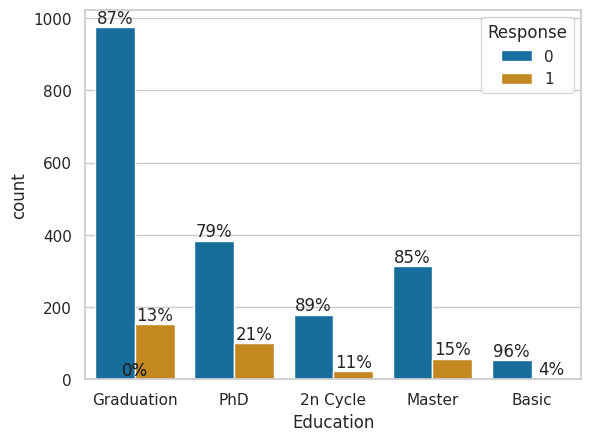

In [ ]:
sumbu = sns.countplot(x='Education', hue='Response', data=df)
tambahkanPersentase(df, 'Education', sumbu)

# Dihasilkan bahwa Phd memiliki ketertarikan paling tinggi untuk menerima penawaran campaign

(0.0, 185000.0)

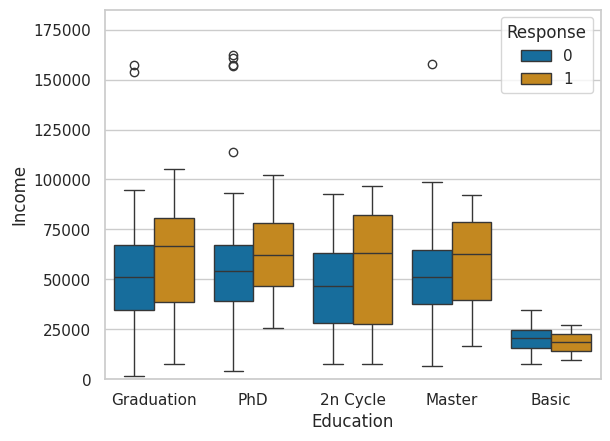

In [ ]:
sns.boxplot(data=df, x='Education', y='Income', hue='Response')
plt.ylim(0, 185000)

# Dihasilkan bahwa Income yang lebih tinggi cenderung menerima/membeli penawaran campaign

## Marital Status

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25


In [ ]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [ ]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO','Alone', 'Absurd'] else str (x))
# Menggabungkan atau mengubah status YOLO, Alone, Absurd menjadi Single.

In [ ]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

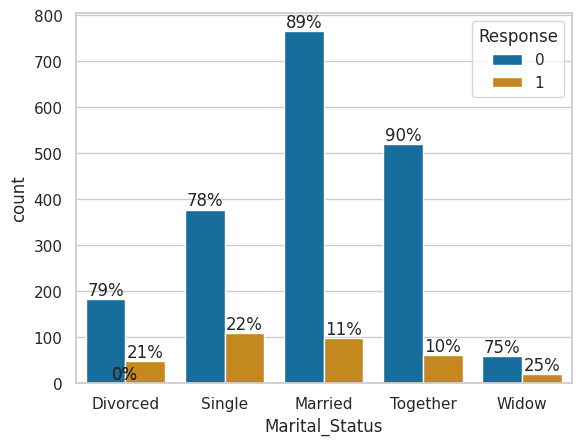

In [ ]:
sumbu = sns.countplot(x='Marital_Status', hue='Response', data=df)
tambahkanPersentase(df, 'Marital_Status', sumbu)

# Dihasilkan bahwa ada kecenderungan jika customer tinggal sendiri/membiayai hidup sendiri
# seperti single dan Divorced membeli/menerima penawaran campaiign

## Kidhome + Teenhome

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25


In [ ]:
df['Num_Dependants'] = df['Kidhome'] + df['Teenhome']
# Membuat kolom baru dari penjumlahan data kidhome dan teenhome

In [ ]:
df.Num_Dependants.unique()

array([0, 1, 2, 3])

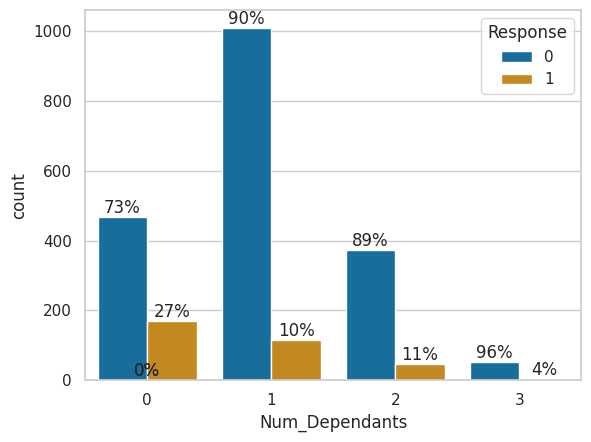

In [ ]:
sumbu = sns.countplot(x='Num_Dependants', hue='Response', data=df)
tambahkanPersentase(df, 'Num_Dependants', sumbu)

# Dihasilkan bahwa customer yaang tinggal sendiri cenderung menerima penawaran campaign

## Customer Join Date

In [ ]:
df['Dt_Customer_Month'] = df['Dt_Customer'].dt.month
df['Dt_Customer_Year'] = df['Dt_Customer'].dt.year

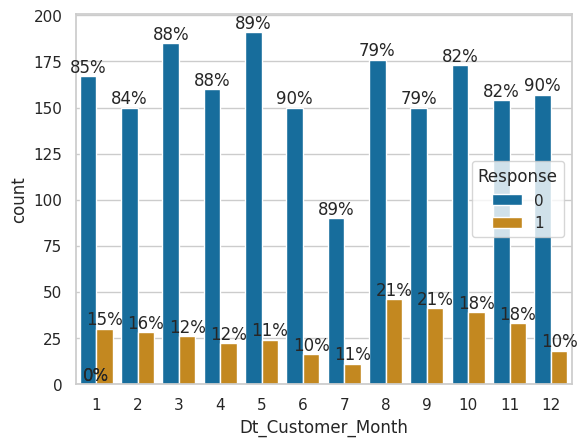

In [ ]:
sumbu = sns.countplot(x='Dt_Customer_Month', hue='Response', data=df)
tambahkanPersentase(df, 'Dt_Customer_Month', sumbu)

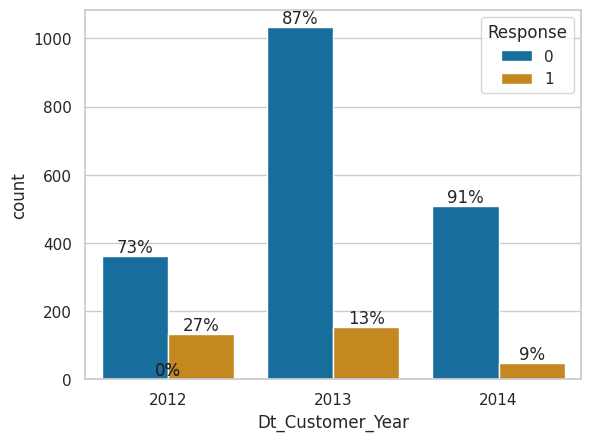

In [ ]:
sumbu = sns.countplot(x='Dt_Customer_Year', hue='Response', data=df)
tambahkanPersentase(df, 'Dt_Customer_Year', sumbu)

# Didapatkan hasil bahwa semakin lama Customer yang join sebelumnya, maka semakin besar kemungkinan mereka join campaign

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014


## Recency

<Axes: xlabel='Recency', ylabel='Count'>

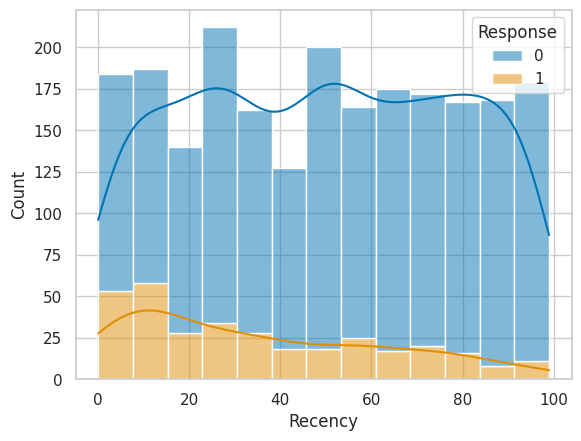

In [ ]:
sns.histplot(data=df, x='Recency',hue='Response', multiple='stack', kde=True)

# Didapatkan hasil bahwa customer yang belum lama membeli, cenderung untuk menerima penawaran campaign terbaru

In [ ]:
display(df.Recency)

,Recency
0,0
1,0
2,0
3,0
4,0
...,...
2232,99
2233,99
2234,99
2235,99


## Amount Spent

In [ ]:
amt_spent_features = [c for c in df.columns if 'Mnt' in str(c)]
# List Comprehension: yang merupakan pembuataan list kolom df baru dengan looping untuk memilih kolom yang memiliki "Mnt" didalam namanya
amt_spent_features.append('Response')
# menambahkan kolom response ke dalam df baru sebelumnya
display(amt_spent_features)

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'Response']

In [ ]:
df[amt_spent_features].corr()[['Response']].sort_values(by='Response', ascending=False)
# untuk menghitung kolerasi antara fitur' tertentu dengan kolom 'Response' dalam df
# .corr() untuk menghitung korelasi antar kolom  dengan hasil matriks korelasi yang menunjukkan hubungan antar kolom dalma bentuk nilai -1 sampai 1
# ascending=False itu haislkan akan mengurutkan dari nilai tertinggi ke rendah

,Response
Response,1.000000
MntWines,0.247392
MntMeatProducts,0.236640
MntGoldProds,0.140693
MntFruits,0.125904
MntSweetProducts,0.117366
MntFishProducts,0.111415


In [ ]:
amt_spent_features = [c for c in df.columns if 'Mnt' in str(c)]
df['TotalAmountSpent'] = df[amt_spent_features].sum(axis=1)
# untuk menjumlahkan nilai di kolom yang dipilih untuk setiap baris.
# .sum(axis=1) → Menjumlahkan nilai di setiap baris (karena axis=1 berarti operasi dilakukan secara horizontal).
# df['TotalAmountSpent'] = ... → Menyimpan hasil penjumlahan dalam kolom baru bernama 'TotalAmountSpent'.

<Axes: xlabel='TotalAmountSpent', ylabel='Count'>

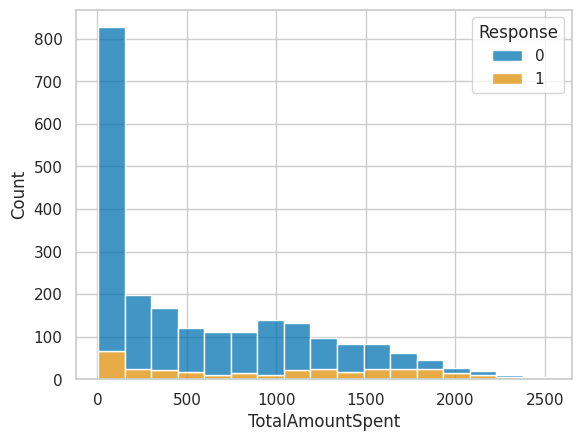

In [ ]:
sns.histplot(data=df, x='TotalAmountSpent', hue='Response', multiple='stack', kde=False)
# Didapatkan hasil, jika customer sudah ngespent money di sekitar 1000-2000 dollar, maka costumer cenderung menerima penawaran campaign

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmountSpent
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014,91


## Purchases

In [ ]:
purchase_features = [c for c in df.columns if 'Purchase' in str(c)]
purchase_features.append('Response')
display(purchase_features)

['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'Response']

In [ ]:
df[purchase_features].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
NumCatalogPurchases,0.220894
NumWebPurchases,0.148453
NumStorePurchases,0.038855
NumDealsPurchases,0.001854


In [ ]:
purchase_features =  [c for c in df.columns if 'Purchase' in str(c)]
df['Total_Purchases'] = df[purchase_features].sum(axis=1)

<Axes: xlabel='Total_Purchases', ylabel='Count'>

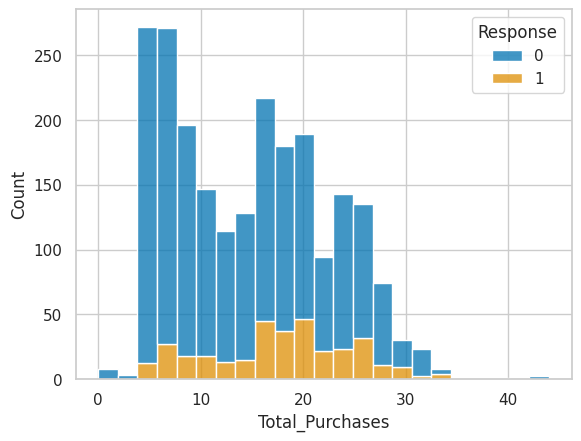

In [ ]:
sns.histplot(data=df, x='Total_Purchases', hue='Response', multiple='stack', kde=False)

#  Dihasilkan tidak ada pola unik atau pemisah antara response 0 dan 1

## Num Web Visits Month

In [ ]:
df[['NumWebVisitsMonth', 'Response']].corr()['Response']

# Jika hasilnya - atau mendeketi 0 artinyaa ini tidak memiliki korelasi terhadap response / Random. Untuk mengetahui hubungan customer akan menerima atau tidak, NumWeb ini tidak bisa digunakan

,Response
NumWebVisitsMonth,-0.004449
Response,1.000000


## Previous Campaign

In [ ]:
prev_cmp = [c for c in df.columns if 'AcceptedCmp' in str (c)]
prev_cmp.append('Response')

In [ ]:
df[prev_cmp].corr()[['Response']].sort_values(by='Response', ascending=False)

# Dihasilkan korelasi kurang dari 60%

,Response
Response,1.000000
AcceptedCmp5,0.328182
AcceptedCmp1,0.293882
AcceptedCmp3,0.254144
AcceptedCmp4,0.176890
AcceptedCmp2,0.169249


## Complain

In [ ]:
df[['Complain', 'Response']].corr()[['Response']]

# Dihasilkan tidak memiliki korelasi terhadap response

,Response
Complain,0.000185
Response,1.000000


## Country

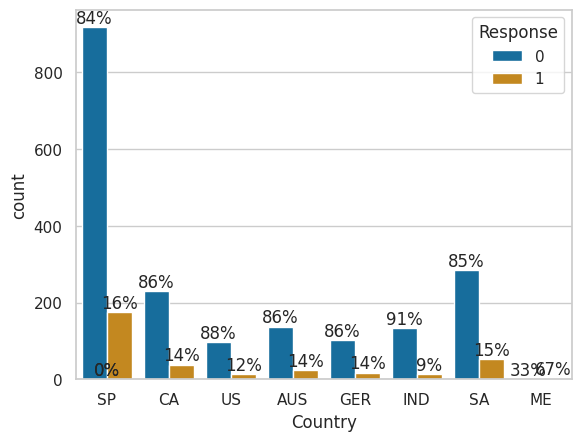

In [ ]:
sumbu =  sns.countplot(x='Country', hue='Response', data=df)
tambahkanPersentase(df, 'Country', sumbu)

# Dihasilkan negara Mexiico dan Spain adalah tempat yang paling cenderung menerima penawaran campaign

# Modelling

## Data Splitting
- Data Train = 60%
- Data Validation = 20%
- Data Test = 20%

In [ ]:
df = pd.read_csv('marketing_data.csv')
df.shape

(2240, 28)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_full_train, df_test=train_test_split(df, test_size=0.2, random_state=1) #data test
df_train, df_valid = train_test_split(df_full_train, test_size=0.25, random_state=1) #data validation , jika ingin mendapatkan data 20% maka harus 0.25

# jika random statenya 1 maka datanya tidak akan berubah dan hanya itu" saja ttidak random.

In [ ]:
df_train.shape, df_valid.shape, df_test.shape

# untuk mengetahui hasil pembagian data yang diambil apakah sudah sesuai

((1344, 28), (448, 28), (448, 28))

In [ ]:
1344/2240, 448/2240, 448/2240

# untuk mengetahui hasil pembagian data yang diambil apakah sudah sesuai

(0.6, 0.2, 0.2)

## Prepocessing

### Numeric Preprocessing

In [ ]:
df_train.columns = df_train.columns.str.replace(' ', '')
df_valid.columns = df_valid.columns.str.replace(' ', '')
df_test.columns = df_test.columns.str.replace(' ', '')

In [ ]:
df_train['Income'] = df_train['Income'].str.replace('$', '')
df_train['Income'] = df_train['Income'].str.replace(',', '')
df_train['Income'] = df_train['Income'].astype('float')

df_valid['Income'] = df_valid['Income'].str.replace('$', '')
df_valid['Income'] = df_valid['Income'].str.replace(',', '')
df_valid['Income'] = df_valid['Income'].astype('float')

df_test['Income'] = df_test['Income'].str.replace('$', '')
df_test['Income'] = df_test['Income'].str.replace(',', '')
df_test['Income'] = df_test['Income'].astype('float')

In [ ]:
df_train['Dt_Customer'] = pd.to_datetime(df_train['Dt_Customer'])
df_valid['Dt_Customer'] = pd.to_datetime(df_valid['Dt_Customer'])
df_test['Dt_Customer'] = pd.to_datetime(df_test['Dt_Customer'])

In [ ]:
df_train['Income'] = df_train['Income'].fillna(df_train['Income'].median())
df_valid['Income'] = df_valid['Income'].fillna(df_valid['Income'].median())
df_test['Income'] = df_test['Income'].fillna(df_test['Income'].median())

In [ ]:
df_train = df_train[df_train['Year_Birth']> 1900].reset_index(drop=True)
df_valid = df_valid[df_valid['Year_Birth']> 1900].reset_index(drop=True)
df_test = df_test[df_test['Year_Birth']> 1900].reset_index(drop=True)

In [ ]:
df_train['Customer_Age'] = df_train['Dt_Customer'].dt.year - df_train['Year_Birth']
df_valid['Customer_Age'] = df_valid['Dt_Customer'].dt.year - df_valid['Year_Birth']
df_test['Customer_Age'] = df_test['Dt_Customer'].dt.year - df_test['Year_Birth']

In [ ]:
df_train['Marital_Status'] = df_train['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO','Alone', 'Absurd'] else str (x))
df_valid['Marital_Status'] = df_valid['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO','Alone', 'Absurd'] else str (x))
df_test['Marital_Status'] = df_test['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO','Alone', 'Absurd'] else str (x))

In [ ]:
df_train['Num_Dependants'] = df_train['Kidhome'] + df['Teenhome']
df_valid['Num_Dependants'] = df_valid['Kidhome'] + df['Teenhome']
df_test['Num_Dependants'] = df_test['Kidhome'] + df['Teenhome']

In [ ]:
df_train['Dt_Customer_Month'] = df_train['Dt_Customer'].dt.month
df_train['Dt_Customer_Year'] = df_train['Dt_Customer'].dt.year

df_valid['Dt_Customer_Month'] = df_valid['Dt_Customer'].dt.month
df_valid['Dt_Customer_Year'] = df_valid['Dt_Customer'].dt.year

df_test['Dt_Customer_Month'] = df_test['Dt_Customer'].dt.month
df_test['Dt_Customer_Year'] = df_test['Dt_Customer'].dt.year

In [ ]:
amt_spent_features = [c for c in df.columns if 'Mnt' in str(c)]
df_train['TotalAmountSpent'] = df_train[amt_spent_features].sum(axis=1)
df_valid['TotalAmountSpent'] = df_valid[amt_spent_features].sum(axis=1)
df_test['TotalAmountSpent'] = df_test[amt_spent_features].sum(axis=1)

In [ ]:
purchase_features =  [c for c in df.columns if 'Purchase' in str(c)]
df_train['Total_Purchases'] = df_train[purchase_features].sum(axis=1)
df_valid['Total_Purchases'] = df_valid[purchase_features].sum(axis=1)
df_test['Total_Purchases'] = df_test[purchase_features].sum(axis=1)

In [ ]:
display(df_train)
display(df_valid)
display(df_test)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmountSpent,Total_Purchases
0,3194,1974,PhD,Single,71466.0,0,0,2014-04-05,86,412,12,546,78,182,0,1,4,4,10,1,0,0,0,0,0,0,0,CA,40,0.0,4,2014,1230,19
1,3599,1970,Graduation,Married,63684.0,0,1,2012-11-26,61,575,80,428,208,93,80,3,8,4,8,5,0,0,0,0,0,0,0,SP,42,0.0,11,2012,1464,23
2,5300,1973,Master,Married,38961.0,1,0,2013-12-30,60,19,7,19,0,1,24,1,2,1,2,7,0,0,0,0,0,0,0,SP,40,2.0,12,2013,70,6
3,7022,1971,Graduation,Married,76445.0,1,0,2012-09-28,2,739,107,309,140,80,35,1,2,5,13,6,0,0,0,0,0,0,0,SA,41,2.0,9,2012,1410,21
4,1726,1970,Graduation,Single,22585.0,0,0,2013-03-18,23,3,9,15,13,2,39,1,1,1,2,9,1,0,0,0,0,1,0,SP,43,0.0,3,2013,81,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,5289,1975,2n Cycle,Single,41658.0,1,1,2012-11-09,30,8,4,12,15,4,29,2,1,1,2,4,0,0,0,0,0,0,0,AUS,37,1.0,11,2012,72,6
1339,8584,1952,PhD,Together,85431.0,0,0,2013-06-08,54,376,53,462,168,53,53,1,2,7,7,0,0,0,0,0,0,0,0,SP,61,0.0,6,2013,1165,17
1340,3130,1964,Graduation,Single,18701.0,1,1,2013-06-04,95,12,4,2,10,6,10,4,2,0,4,5,0,0,0,0,0,0,0,SP,49,1.0,6,2013,44,10
1341,4673,1963,PhD,Married,81300.0,0,1,2012-10-30,17,1004,12,145,32,12,36,3,10,3,5,5,0,0,0,1,0,1,0,SP,49,0.0,10,2012,1241,21


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmountSpent,Total_Purchases
0,7143,1955,2n Cycle,Together,74805.0,0,1,2013-11-06,14,209,162,209,41,162,37,5,4,7,10,2,0,0,0,0,0,0,0,SP,58,0.0,11,2013,820,26
1,6383,1971,PhD,Together,32892.0,1,0,2014-05-25,78,26,0,15,2,1,2,2,3,0,3,8,0,0,0,0,0,0,0,SA,43,1.0,5,2014,46,8
2,2853,1980,Graduation,Single,51766.0,1,0,2014-03-11,74,60,51,87,6,20,51,2,4,2,4,5,0,0,0,0,0,0,0,CA,34,2.0,3,2014,275,12
3,5393,1977,Graduation,Single,23763.0,1,0,2012-08-07,64,22,0,6,6,2,6,1,1,0,3,7,0,0,0,0,0,0,0,SP,35,2.0,8,2012,42,5
4,1340,1986,Graduation,Married,92910.0,0,0,2014-04-24,42,551,137,792,179,103,33,1,6,7,13,1,0,1,1,1,0,0,0,SP,28,0.0,4,2014,1795,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,11074,1977,Graduation,Single,85072.0,0,0,2014-04-09,94,494,92,391,194,11,241,1,3,4,10,0,0,0,0,0,0,0,0,SA,37,0.0,4,2014,1423,18
443,615,1960,Graduation,Together,30507.0,0,0,2013-03-11,29,65,36,74,38,20,110,1,5,1,4,7,0,0,0,0,0,0,0,SP,53,1.0,3,2013,343,11
444,10286,1962,Graduation,Married,83715.0,0,0,2014-02-03,2,318,8,407,150,35,8,1,2,8,13,0,0,0,0,0,0,0,0,SA,52,0.0,2,2014,926,24
445,3619,1960,2n Cycle,Divorced,87305.0,0,0,2012-09-23,19,345,25,501,63,138,80,1,5,3,8,2,0,0,1,0,0,1,0,AUS,52,0.0,9,2012,1152,17


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmountSpent,Total_Purchases
0,9204,1970,Graduation,Widow,66731.0,0,1,2012-09-12,33,371,159,194,58,106,141,4,4,3,6,3,0,0,0,0,0,0,0,SP,42,0.0,9,2012,1029,17
1,1459,1966,PhD,Married,69063.0,0,1,2012-11-07,16,666,35,124,69,8,26,1,5,3,5,3,0,0,0,0,0,0,0,SP,46,0.0,11,2012,928,14
2,4971,1962,PhD,Together,31497.0,0,1,2012-12-06,22,108,1,28,13,1,4,2,3,1,4,8,0,0,0,0,0,0,0,SA,50,1.0,12,2012,155,10
3,3635,1962,PhD,Single,52597.0,0,1,2014-05-07,69,492,0,37,7,0,42,3,6,3,8,5,0,0,0,0,0,0,0,SA,52,1.0,5,2014,578,20
4,4769,1977,Master,Together,57954.0,1,1,2014-06-18,52,456,4,24,0,0,9,7,8,2,6,7,0,1,0,0,0,0,0,SP,37,1.0,6,2014,493,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,9710,1969,PhD,Divorced,58086.0,0,1,2013-01-20,80,708,7,62,0,0,15,2,11,3,7,8,0,0,0,0,0,0,0,SP,44,0.0,1,2013,792,23
443,10270,1981,2n Cycle,Married,35523.0,1,0,2013-10-03,8,11,5,22,12,5,11,2,3,0,3,7,0,0,0,0,0,0,0,GER,32,2.0,10,2013,66,8
444,8405,1979,Graduation,Divorced,68274.0,1,1,2013-09-30,83,135,25,51,23,25,46,2,4,2,5,3,0,0,0,0,0,0,0,SA,34,1.0,9,2013,305,13
445,5667,1964,PhD,Married,60896.0,0,1,2012-10-11,90,1013,30,399,60,46,153,3,9,10,4,6,0,0,0,0,0,1,0,CA,48,0.0,10,2012,1701,26


In [ ]:
cmp_feat = [c for c in df.columns if'AcceptedCmp' in str(c)]
mnt_feat = [c for c in df.columns if'Mnt' in str(c)]
num_feat = [c for c in df.columns if'Num' in str(c)]

In [ ]:
numeric_feat = ['Income', 'Kidhome', 'Teenhome', 'Recency','Complain','Customer_Age', 'Num_Dependants', 'Dt_Customer_Month','Dt_Customer_Year','TotalAmountSpent', 'Total_Purchases']

In [ ]:
all_numeric_feat = numeric_feat + cmp_feat + mnt_feat + num_feat

In [ ]:
display(df_train[all_numeric_feat])
display(df_valid[all_numeric_feat])
display(df_test[all_numeric_feat])

,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmountSpent,Total_Purchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,71466.0,0,0,86,0,40,0.0,4,2014,1230,19,0,0,0,0,0,412,12,546,78,182,0,1,4,4,10,1
1,63684.0,0,1,61,0,42,0.0,11,2012,1464,23,0,0,0,0,0,575,80,428,208,93,80,3,8,4,8,5
2,38961.0,1,0,60,0,40,2.0,12,2013,70,6,0,0,0,0,0,19,7,19,0,1,24,1,2,1,2,7
3,76445.0,1,0,2,0,41,2.0,9,2012,1410,21,0,0,0,0,0,739,107,309,140,80,35,1,2,5,13,6
4,22585.0,0,0,23,0,43,0.0,3,2013,81,5,1,0,0,0,0,3,9,15,13,2,39,1,1,1,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,41658.0,1,1,30,0,37,1.0,11,2012,72,6,0,0,0,0,0,8,4,12,15,4,29,2,1,1,2,4
1339,85431.0,0,0,54,0,61,0.0,6,2013,1165,17,0,0,0,0,0,376,53,462,168,53,53,1,2,7,7,0
1340,18701.0,1,1,95,0,49,1.0,6,2013,44,10,0,0,0,0,0,12,4,2,10,6,10,4,2,0,4,5
1341,81300.0,0,1,17,0,49,0.0,10,2012,1241,21,0,0,0,1,0,1004,12,145,32,12,36,3,10,3,5,5


,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmountSpent,Total_Purchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,74805.0,0,1,14,0,58,0.0,11,2013,820,26,0,0,0,0,0,209,162,209,41,162,37,5,4,7,10,2
1,32892.0,1,0,78,0,43,1.0,5,2014,46,8,0,0,0,0,0,26,0,15,2,1,2,2,3,0,3,8
2,51766.0,1,0,74,0,34,2.0,3,2014,275,12,0,0,0,0,0,60,51,87,6,20,51,2,4,2,4,5
3,23763.0,1,0,64,0,35,2.0,8,2012,42,5,0,0,0,0,0,22,0,6,6,2,6,1,1,0,3,7
4,92910.0,0,0,42,0,28,0.0,4,2014,1795,27,0,1,1,1,0,551,137,792,179,103,33,1,6,7,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,85072.0,0,0,94,0,37,0.0,4,2014,1423,18,0,0,0,0,0,494,92,391,194,11,241,1,3,4,10,0
443,30507.0,0,0,29,0,53,1.0,3,2013,343,11,0,0,0,0,0,65,36,74,38,20,110,1,5,1,4,7
444,83715.0,0,0,2,0,52,0.0,2,2014,926,24,0,0,0,0,0,318,8,407,150,35,8,1,2,8,13,0
445,87305.0,0,0,19,0,52,0.0,9,2012,1152,17,0,0,1,0,0,345,25,501,63,138,80,1,5,3,8,2


,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmountSpent,Total_Purchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,66731.0,0,1,33,0,42,0.0,9,2012,1029,17,0,0,0,0,0,371,159,194,58,106,141,4,4,3,6,3
1,69063.0,0,1,16,0,46,0.0,11,2012,928,14,0,0,0,0,0,666,35,124,69,8,26,1,5,3,5,3
2,31497.0,0,1,22,0,50,1.0,12,2012,155,10,0,0,0,0,0,108,1,28,13,1,4,2,3,1,4,8
3,52597.0,0,1,69,0,52,1.0,5,2014,578,20,0,0,0,0,0,492,0,37,7,0,42,3,6,3,8,5
4,57954.0,1,1,52,0,37,1.0,6,2014,493,23,0,1,0,0,0,456,4,24,0,0,9,7,8,2,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,58086.0,0,1,80,0,44,0.0,1,2013,792,23,0,0,0,0,0,708,7,62,0,0,15,2,11,3,7,8
443,35523.0,1,0,8,0,32,2.0,10,2013,66,8,0,0,0,0,0,11,5,22,12,5,11,2,3,0,3,7
444,68274.0,1,1,83,0,34,1.0,9,2013,305,13,0,0,0,0,0,135,25,51,23,25,46,2,4,2,5,3
445,60896.0,0,1,90,0,48,0.0,10,2012,1701,26,0,0,0,0,0,1013,30,399,60,46,153,3,9,10,4,6


### Categoric Preprocessing

In [ ]:
df_train.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmountSpent,Total_Purchases
0,3194,1974,PhD,Single,71466.0,0,0,2014-04-05,86,412,12,546,78,182,0,1,4,4,10,1,0,0,0,0,0,0,0,CA,40,0.0,4,2014,1230,19
1,3599,1970,Graduation,Married,63684.0,0,1,2012-11-26,61,575,80,428,208,93,80,3,8,4,8,5,0,0,0,0,0,0,0,SP,42,0.0,11,2012,1464,23
2,5300,1973,Master,Married,38961.0,1,0,2013-12-30,60,19,7,19,0,1,24,1,2,1,2,7,0,0,0,0,0,0,0,SP,40,2.0,12,2013,70,6
3,7022,1971,Graduation,Married,76445.0,1,0,2012-09-28,2,739,107,309,140,80,35,1,2,5,13,6,0,0,0,0,0,0,0,SA,41,2.0,9,2012,1410,21
4,1726,1970,Graduation,Single,22585.0,0,0,2013-03-18,23,3,9,15,13,2,39,1,1,1,2,9,1,0,0,0,0,1,0,SP,43,0.0,3,2013,81,5


In [ ]:
categoric_feat = ['Education', 'Marital_Status', 'Country']

In [ ]:
all_feat = categoric_feat + all_numeric_feat

In [ ]:
df_train_final = df_train[all_feat]
df_valid_final = df_valid[all_feat]
df_test_final = df_test[all_feat]

#### Categoric
- Education (Ordinal, ada tingkatannya)
- Marital_Status (Nominal, rata tidak ada tingkatannya)
- Country (Nominal)

In [ ]:
df_train.Education.unique()

array(['PhD', 'Graduation', 'Master', '2n Cycle', 'Basic'], dtype=object)

In [ ]:
Education = {'Basic':1, 'Graduation':2, '2n Cycle':3, 'Master':4, 'PhD':5}

In [ ]:
df_train_final['Education'] = df_train_final['Education'].map(Education)
df_valid_final['Education'] = df_valid_final['Education'].map(Education)
df_test_final['Education'] = df_test_final['Education'].map(Education)

In [ ]:
display(df_train_final)

,Education,Marital_Status,Country,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmountSpent,Total_Purchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5,Single,CA,71466.0,0,0,86,0,40,0.0,4,2014,1230,19,0,0,0,0,0,412,12,546,78,182,0,1,4,4,10,1
1,2,Married,SP,63684.0,0,1,61,0,42,0.0,11,2012,1464,23,0,0,0,0,0,575,80,428,208,93,80,3,8,4,8,5
2,4,Married,SP,38961.0,1,0,60,0,40,2.0,12,2013,70,6,0,0,0,0,0,19,7,19,0,1,24,1,2,1,2,7
3,2,Married,SA,76445.0,1,0,2,0,41,2.0,9,2012,1410,21,0,0,0,0,0,739,107,309,140,80,35,1,2,5,13,6
4,2,Single,SP,22585.0,0,0,23,0,43,0.0,3,2013,81,5,1,0,0,0,0,3,9,15,13,2,39,1,1,1,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,3,Single,AUS,41658.0,1,1,30,0,37,1.0,11,2012,72,6,0,0,0,0,0,8,4,12,15,4,29,2,1,1,2,4
1339,5,Together,SP,85431.0,0,0,54,0,61,0.0,6,2013,1165,17,0,0,0,0,0,376,53,462,168,53,53,1,2,7,7,0
1340,2,Single,SP,18701.0,1,1,95,0,49,1.0,6,2013,44,10,0,0,0,0,0,12,4,2,10,6,10,4,2,0,4,5
1341,5,Married,SP,81300.0,0,1,17,0,49,0.0,10,2012,1241,21,0,0,0,1,0,1004,12,145,32,12,36,3,10,3,5,5


Karena nominal tidak memiliki tingkatan, untuk mengubahnya menjadi urutan tingkatan, maka perlu adanya metode **one hot encoding**

In [ ]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

In [ ]:
df_train_final_dict = df_train_final.to_dict(orient='records')
df_valid_final_dict = df_valid_final.to_dict(orient='records')
df_test_final_dict = df_test_final.to_dict(orient='records')

In [ ]:
df_train_final_dict[0:2]

# untuk melihat isi di setiap row dalam perintah menunjukkan row 1-2

[{'Education': 5,
  'Marital_Status': 'Single',
  'Country': 'CA',
  'Income': 71466.0,
  'Kidhome': 0,
  'Teenhome': 0,
  'Recency': 86,
  'Complain': 0,
  'Customer_Age': 40,
  'Num_Dependants': 0.0,
  'Dt_Customer_Month': 4,
  'Dt_Customer_Year': 2014,
  'TotalAmountSpent': 1230,
  'Total_Purchases': 19,
  'AcceptedCmp3': 0,
  'AcceptedCmp4': 0,
  'AcceptedCmp5': 0,
  'AcceptedCmp1': 0,
  'AcceptedCmp2': 0,
  'MntWines': 412,
  'MntFruits': 12,
  'MntMeatProducts': 546,
  'MntFishProducts': 78,
  'MntSweetProducts': 182,
  'MntGoldProds': 0,
  'NumDealsPurchases': 1,
  'NumWebPurchases': 4,
  'NumCatalogPurchases': 4,
  'NumStorePurchases': 10,
  'NumWebVisitsMonth': 1},
 {'Education': 2,
  'Marital_Status': 'Married',
  'Country': 'SP',
  'Income': 63684.0,
  'Kidhome': 0,
  'Teenhome': 1,
  'Recency': 61,
  'Complain': 0,
  'Customer_Age': 42,
  'Num_Dependants': 0.0,
  'Dt_Customer_Month': 11,
  'Dt_Customer_Year': 2012,
  'TotalAmountSpent': 1464,
  'Total_Purchases': 23,
  'Acc

In [ ]:
df_train_final_dict = dv.fit_transform(df_train_final_dict)
df_valid_final_dict = dv.transform(df_valid_final_dict)
# bagian setelahnya gk perlu ada tambahan .fit karena dibaris awal sudah di training terlebih dahulu sehingga dapat membaca tanpa fit
df_test_final_dict = dv.transform(df_test_final_dict)

In [ ]:
df_train_final = pd.DataFrame(df_train_final_dict, columns = dv.get_feature_names_out())
df_valid_final = pd.DataFrame(df_valid_final_dict, columns = dv.get_feature_names_out())
df_test_final = pd.DataFrame(df_test_final_dict, columns = dv.get_feature_names_out())

# Perintah ini digunakan untuk mengganti data yang berupa string menjadi numeric, yaitu 0: salah dan 1: benar

In [ ]:
df_test_final.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Country=AUS,Country=CA,Country=GER,Country=IND,Country=ME,Country=SA,Country=SP,Country=US,Customer_Age,Dt_Customer_Month,Dt_Customer_Year,Education,Income,Kidhome,Marital_Status=Divorced,Marital_Status=Married,Marital_Status=Single,Marital_Status=Together,Marital_Status=Widow,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Num_Dependants,Recency,Teenhome,TotalAmountSpent,Total_Purchases
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,42.0,9.0,2012.0,2.0,66731.0,0.0,0.0,0.0,0.0,0.0,1.0,58.0,159.0,141.0,194.0,106.0,371.0,3.0,4.0,6.0,4.0,3.0,0.0,33.0,1.0,1029.0,17.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,46.0,11.0,2012.0,5.0,69063.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,35.0,26.0,124.0,8.0,666.0,3.0,1.0,5.0,5.0,3.0,0.0,16.0,1.0,928.0,14.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,50.0,12.0,2012.0,5.0,31497.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,1.0,4.0,28.0,1.0,108.0,1.0,2.0,4.0,3.0,8.0,1.0,22.0,1.0,155.0,10.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,52.0,5.0,2014.0,5.0,52597.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,42.0,37.0,0.0,492.0,3.0,3.0,8.0,6.0,5.0,1.0,69.0,1.0,578.0,20.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.0,6.0,2014.0,4.0,57954.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,9.0,24.0,0.0,456.0,2.0,7.0,6.0,8.0,7.0,1.0,52.0,1.0,493.0,23.0


## Modelling
- x: Independent Variable (Ex: All_feat)
- y: Dependent Variable (Target Variable) --> Response (Ex: df_train.response)

In [ ]:
x_train_final = df_train_final
x_valid_final = df_valid_final
x_test_final = df_test_final
# Mengubah nama variabel x nya

In [ ]:
y_train_final = df_train.Response
y_valid_final = df_valid.Response
y_test_final = df_test.Response

## Base Modell

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import roc_auc_score

# untuk mengetahui klasifikasi yang kita miliki bagus atau tidak

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(x_train_final, y_train_final) # untuk mempelajari dataset yang ada

LogisticRegression(random_state=42)

In [ ]:
y_valid_pred = model.predict_proba(x_valid_final)[:,1]

In [ ]:
print('LogisticRegression ROCAUC Result:', roc_auc_score(y_valid_final, y_valid_pred).round(3))

LogisticRegression ROCAUC Result: 0.747


### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train_final, y_train_final) # untuk mempelajari dataset yang ada

RandomForestClassifier(random_state=42)

In [ ]:
y_valid_pred = model.predict_proba(x_valid_final)[:,1]

In [ ]:
print('RandomForest ROCAUC Result:', roc_auc_score(y_valid_final, y_valid_pred).round(3))

RandomForest ROCAUC Result: 0.886


## Performance Stabilty Check

In [ ]:
x_full_train_final = pd.concat([x_train_final, x_valid_final])
y_full_train_final = pd.concat([y_train_final, y_valid_final])

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(x_full_train_final, y_full_train_final) # untuk mempelajari dataset yang ada

RandomForestClassifier(random_state=42)

In [ ]:
y_test_final_pred = model.predict_proba(x_test_final)[:,1]

In [ ]:
print('RandomForest ROCAUC Result:', roc_auc_score(y_test_final, y_test_final_pred).round(3))

RandomForest ROCAUC Result: 0.881


## Interpretation & Conclution

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model) #menghitung shap
shap_values_new= explainer.shap_values(x_test_final)

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values_new = explainer.shap_values(x_test_final)

print(shap_values_new.shape)  # Harus (447, 1) atau (447,)
print(x_test_final.shape) # Harus (447, 41)

(447, 41, 2)
(447, 41)


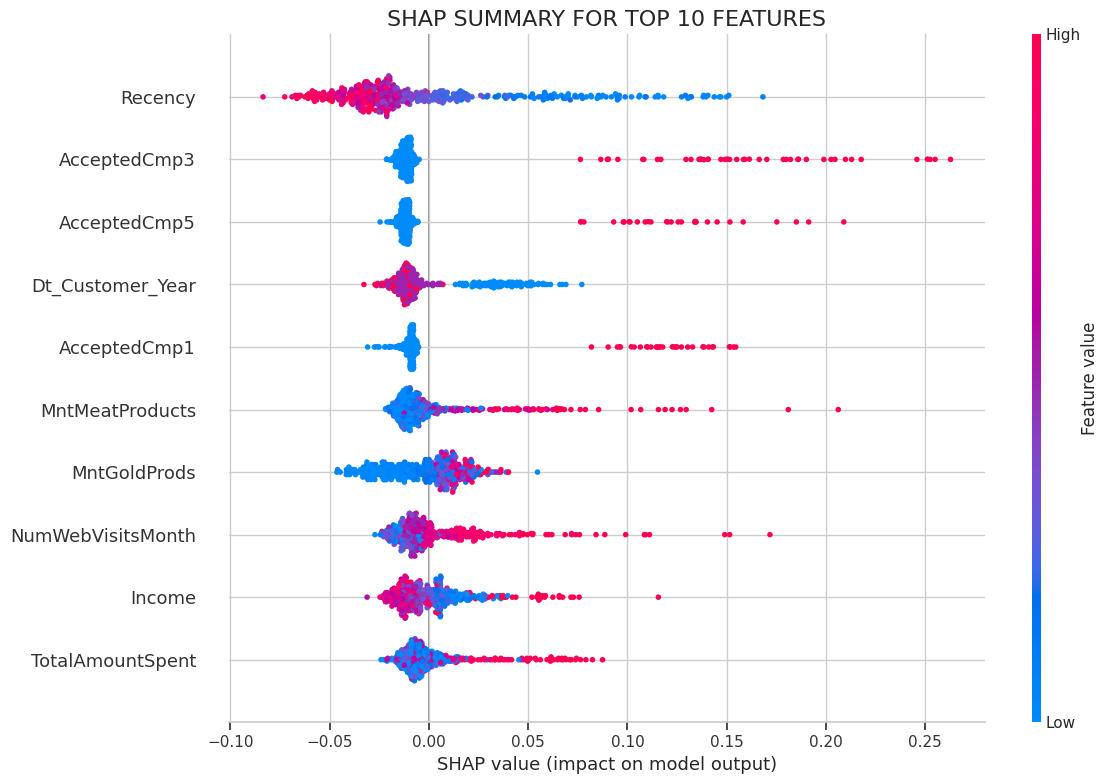

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('SHAP SUMMARY FOR TOP 10 FEATURES', size=16)
shap.summary_plot(shap_values_new[:, :, 1], x_test_final, max_display=10, plot_size=[12,8])

### 0.00 - 0.25 : memberikan hasil positif bagi campaign
### 0.00 - (-0.10) : memberikan hasil negatif bagi campaign

- **Recency** (kolom mengenai angka tanggal terakhir sejak membeli barang jadi, jika angka terendah ex: 0 itu banyak, maka dapat dihasilkan bahwa warna biru di sisi kanan itu mksdnya, banyak yang menerima campaign ini)
- **Accepted** (kolom menerima campaign ini terdiri dari angka 0 (biru, tidak menerima) dan 1(merah, menerima campaign). Jadi bisa disimpulkan bahwa banyak customer menerima campaign ini)
- **Dt_Customer** (kolom mengenai tanggal pendaftaran/join customer, ex: 2012 (biru, paling lama) dan 2014 (merah, paling baru). Jadi bisa disimpulkan bahwa customer lama banyak menerima campaign nya)
- **Mnt/Amount Spent **(kolom mengenia spent money untuk pembelian produk perusahaa. Ex: 0(biru, spent sedikit) dan 2000(merah, spent banyak).Jadi jika customer yang sudah spent banyak, ha ini cenderung menerima campaign ini)


- ***Income & NumWeb blm jelas karena blm di analysis dengan baik. jadi perlu adanya analysis.***